# Exploratory Data Analysis (EDA) of variables that affect car price

# Import all libraries and input files

In [94]:
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt
import types
import pandas as pd
import numpy as np
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_bf63d8034a7a4cfe81617b85e5075c04 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='-NOL9f02-0zxvKQR-9Hq6ZlEBVDocM1caFJ0IRBnRLKG',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_bf63d8034a7a4cfe81617b85e5075c04.get_object(Bucket='carpriceeda-donotdelete-pr-jz56v8gksrtghu',Key='cars.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

cars_df = pd.read_csv(body)
cars_df.head()


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,NaN,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
1,NaN,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,13495.0,11.190476190476200,Medium,0,1
2,NaN,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111.0,5000.0,21,27,16500.0,11.190476190476200,Medium,0,1
3,NaN,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,...,9.0,154.0,5000.0,19,26,16500.0,12.36842105263160,Medium,0,1
4,NaN,2,164,audi,std,four,sedan,fwd,front,99.8,...,10.0,102.0,5500.0,24,30,13950.0,9.791666666666670,Medium,0,1


# Fix the headers and review the columns

In [95]:
# Dropping first column, since it doesn't have any information
cars_df = cars_df.iloc[:, 1:]

# The first row of the dataframe seems to have all the headers. So let's set the header values to the 
# values in the first row
headers = cars_df.loc[0].values.tolist()
cars_df.columns = headers

# Drop the first row now
cars_df = cars_df.iloc[1:, :]

# Reset index
cars_df.reset_index(drop=True, inplace=True)
cars_df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.8111484863046610,...,9.0,111.0,5000.0,21,27,13495.0,11.190476190476200,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.8111484863046610,...,9.0,111.0,5000.0,21,27,16500.0,11.190476190476200,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.8226814031715520,...,9.0,154.0,5000.0,19,26,16500.0,12.36842105263160,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.8486304661220570,...,10.0,102.0,5500.0,24,30,13950.0,9.791666666666670,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.8486304661220570,...,8.0,115.0,5500.0,18,22,17450.0,13.055555555555600,Medium,0,1


In [96]:
# What are the data types of the columns
cars_df.dtypes

symboling            object
normalized-losses    object
make                 object
aspiration           object
num-of-doors         object
body-style           object
drive-wheels         object
engine-location      object
wheel-base           object
length               object
width                object
height               object
curb-weight          object
engine-type          object
num-of-cylinders     object
engine-size          object
fuel-system          object
bore                 object
stroke               object
compression-ratio    object
horsepower           object
peak-rpm             object
city-mpg             object
highway-mpg          object
price                object
city-L/100km         object
horsepower-binned    object
diesel               object
gas                  object
dtype: object

In [97]:
# Fix the data types of the columns
cars_df['wheel-base'] = cars_df['wheel-base'].astype('float')
cars_df['length'] = cars_df['length'].astype('float')
cars_df['width'] = cars_df['width'].astype('float')
cars_df['height'] = cars_df['height'].astype('float')
cars_df['curb-weight'] = cars_df['curb-weight'].astype('float')
cars_df['engine-size'] = cars_df['engine-size'].astype('int')
cars_df['bore'] = cars_df['bore'].astype('float')
cars_df['stroke'] = cars_df['stroke'].astype('float')
cars_df['compression-ratio'] = cars_df['compression-ratio'].astype('float')
cars_df['horsepower'] = cars_df['horsepower'].astype('float')
cars_df['peak-rpm'] = cars_df['peak-rpm'].astype('float')
cars_df['city-mpg'] = cars_df['city-mpg'].astype('int')
cars_df['highway-mpg'] = cars_df['highway-mpg'].astype('int')
cars_df['price'] = cars_df['price'].astype('float')
cars_df['city-L/100km'] = cars_df['city-L/100km'].astype('float')
cars_df['diesel'] = cars_df['diesel'].astype('int')
cars_df['gas'] = cars_df['gas'].astype('int')

# Let's look at the statistical characteristics of the dataframe. Remember, the describe() function returns the distribution of all float and int data types. Using the include='all' option will return the distribution of categorical columns as well. NaN cells are simply excluded by the describe() function.

In [98]:
# Statistical characteristics for all columns, including categorical 
cars_df.describe(include='all')

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
count,201,201,201,201,201,201,201,201,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,200,201.000000,201.000000
unique,6,51,22,2,2,5,3,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
top,0,122,toyota,std,four,sedan,fwd,front,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,NaN,NaN
freq,65,41,32,165,115,94,118,198,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.797015,0.837102,...,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,NaN,0.099502,0.900498
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.066366,0.059213,...,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,NaN,0.300083,0.300083
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,0.678039,...,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,0.801538,...,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,NaN,0.000000,1.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,0.832292,...,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,NaN,0.000000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,0.881788,...,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,NaN,0.000000,1.000000


# An interesting function is value_counts(). It gives you the unique values of the column and how many times each unique value occurs

In [99]:
# Find how many different wheel drives are there
drive_wheel_counts = cars_df['drive-wheels'].value_counts()
drive_wheel_counts

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [100]:
# Let's enter this information into a dataframe, so that it's easier to visualize
drive_wheel_counts = pd.DataFrame(drive_wheel_counts)
drive_wheel_counts.rename(columns={'drive-wheels':'value_counts'}, inplace=True)
drive_wheel_counts.index.name = 'drive-wheels'
drive_wheel_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [117]:
# Find how many different engine locations are there
engine_location_counts = cars_df['engine-location'].value_counts()
engine_location_counts

front    198
rear       3
Name: engine-location, dtype: int64

In [118]:
# Let's enter this information into a dataframe, so that it's easier to visualize
engine_location_counts = pd.DataFrame(engine_location_counts)
engine_location_counts.rename(columns={'engine-location':'value_counts'}, inplace=True)
engine_location_counts.index.name = 'engine-location'
engine_location_counts

,value_counts
engine-location,
front,198
rear,3


In [136]:
# Find how many different body styles are there
body_style_counts = cars_df['body-style'].value_counts()
body_style_counts

sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [137]:
# Let's enter this information into a dataframe, so that it's easier to visualize
body_style_counts = pd.DataFrame(body_style_counts)
body_style_counts.rename(columns={'body-style':'value_counts'}, inplace=True)
body_style_counts.index.name = 'body_style'
body_style_counts

,value_counts
body_style,
sedan,94
hatchback,68
wagon,25
hardtop,8
convertible,6


# Boxplots are a great way to visualize distribution of data. They show the median, upper and lower quartiles, upper and lower extremes, and all outliers.

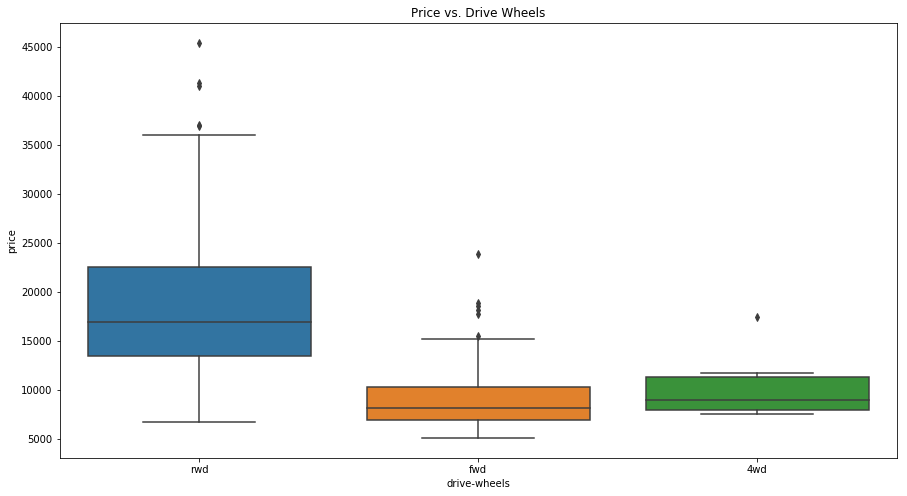

In [103]:
# Let's visualize box plot for the drive-wheels
plt.figure(figsize=(15,8))
plt.title('Price vs. Drive Wheels')
sns.boxplot(x='drive-wheels', y='price', data=cars_df)

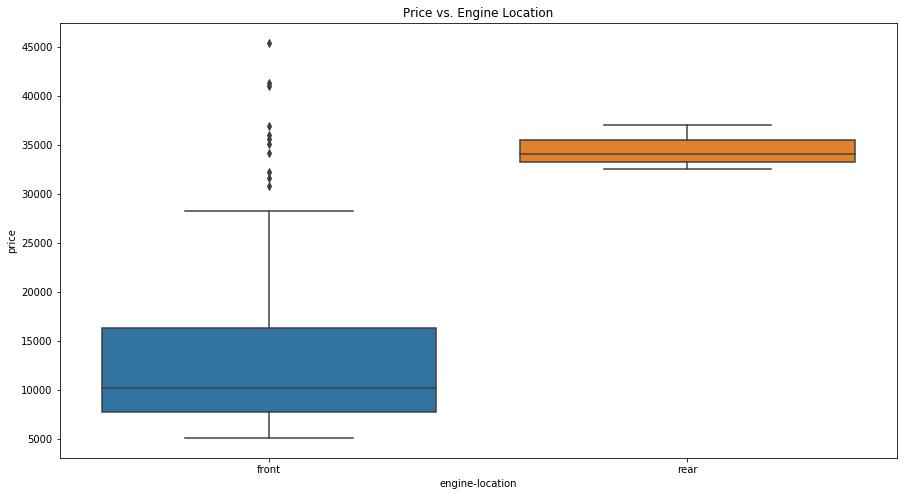

In [119]:
# Let's see how many values are there for engine location
plt.figure(figsize=(15,8))
plt.title('Price vs. Engine Location')
sns.boxplot(x='engine-location', y='price', data=cars_df)

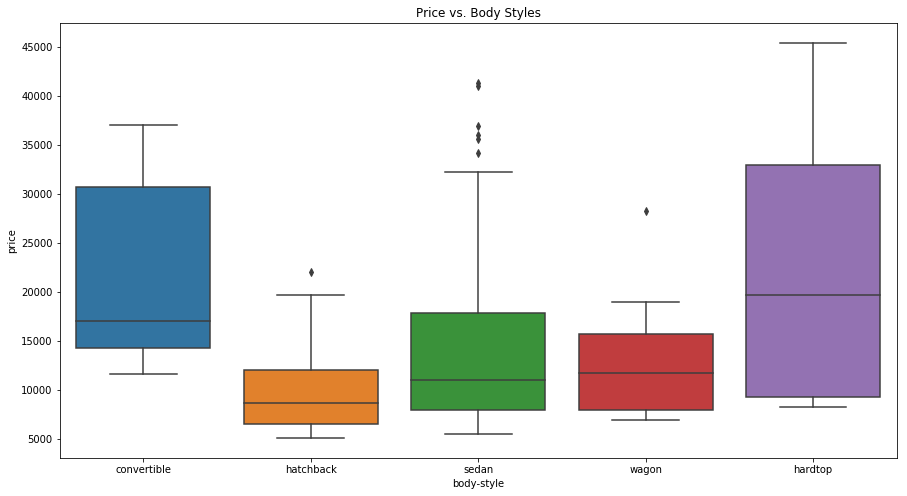

In [138]:
# Let's see how many values are there for body styles
plt.figure(figsize=(15,8))
plt.title('Price vs. Body Styles')
sns.boxplot(x='body-style', y='price', data=cars_df)

# Using groupby to group data by different categories, we can analyse how the grouped variables can determine the target variable

In [146]:
# Create a group with drive-wheels, body-style and price
engine_loc_body_style = cars_df[['drive-wheels', 'body-style', 'price']]
engine_loc_body_style_grp = engine_loc_body_style.groupby(['drive-wheels', 'body-style'], as_index=False).mean()
engine_loc_body_style_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


# Use pivot table to visualize the grouped data

In [149]:
# Pivot table 
engine_loc_body_style_grp_pivot = engine_loc_body_style_grp.pivot(index='drive-wheels', columns='body-style')

# Fill any NaN with 0
engine_loc_body_style_grp_pivot = engine_loc_body_style_grp_pivot.fillna(0)
engine_loc_body_style_grp_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

# The pivot table above shows how the grouped data can help predict the target variable. If we want to visualize the pivot table shown above, we can use a heatmap. 

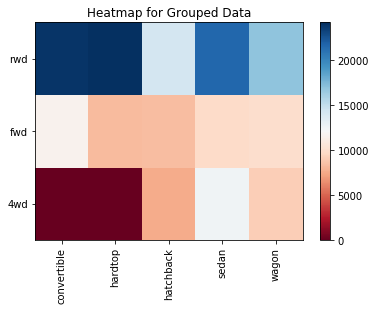

In [152]:
# heatmap for grouped variables
fig, ax = plt.subplots()
im = ax.pcolor(engine_loc_body_style_grp_pivot, cmap='RdBu')

#label names
row_labels = engine_loc_body_style_grp_pivot.columns.levels[1]
col_labels = engine_loc_body_style_grp_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(engine_loc_body_style_grp_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(engine_loc_body_style_grp_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)
plt.title('Heatmap for Grouped Data')
fig.colorbar(im)
plt.show()

# The heatmap shown above is an excellent visualization of how the price of the car changes, based on it's body style and drive-wheels.

# Let's look at the correlation, if any, between the target variable and the continuous predictor variables. This will indicate which variables are useful in predicting the target variable.

# The corr() function calculates Pearson Correlation by default. Pearson correlation measures how closely 2 variables are related to each other. In other words, it measures the dependence between the 2 variables. The resulting coefficients range in value between -1 (strong negative correlation) to +1 (strong positive correlation), with 0 being no correlation.

# P-value is the probability that the correlation between the 2 variables is statistically significant. 
# <0.001 : strong evidence that correlation is significant
# <0.05   : moderate evidence that correlation is significant
# <0.01   : weak evidence that correlation is significant
# >0.1     : no evidence that correlation is significant

In [104]:
# Correlation between all the variables
cars_df.corr()

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
wheel-base,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303
compression-ratio,0.250313,0.159733,0.189867,0.259737,0.156433,0.028889,0.001263,0.187923,1.000000,-0.214514,-0.435780,0.331425,0.268465,0.071107,-0.299372,0.985231,-0.985231
horsepower,0.371147,0.579821,0.615077,-0.087027,0.757976,0.822676,0.566936,0.098462,-0.214514,1.000000,0.107885,-0.822214,-0.804575,0.809575,0.889488,-0.169053,0.169053


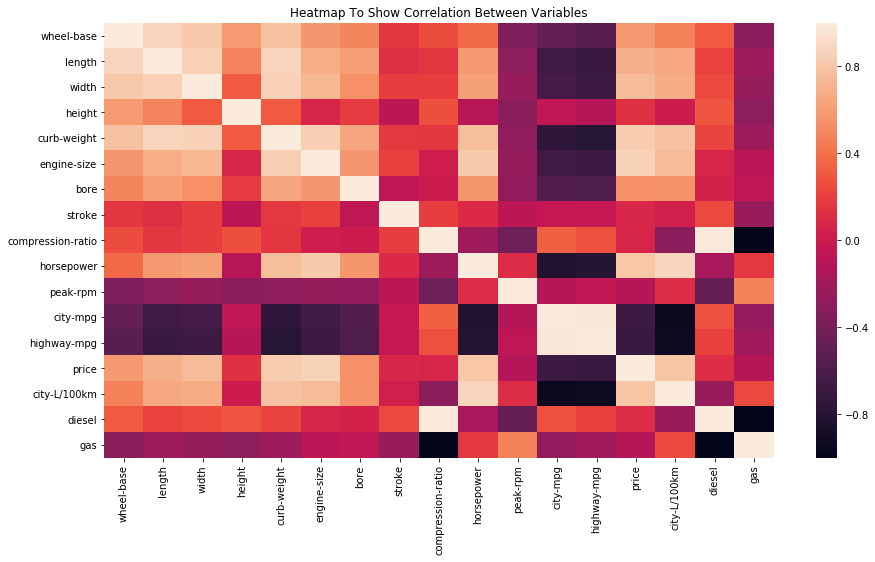

In [115]:
# A heatmap will enable us to visualize the correlation
cars_corr = cars_df.corr()
plt.figure(figsize=(15,8))
plt.title('Heatmap To Show Correlation Between Variables')
sns.heatmap(cars_corr)

# Let's observe the heatmap above and see how the other variables are related to the price. The darkest and the lightest shaded cells indicate strong negative or positive correlation. Of course, the highest correlation of any variable will be with itself. Other than that, we see a significant correlation between price and engine size, horsepower and gas mileage related variables.

In [132]:
# Pearson correlation between horsepower and price
pearson_coef, p_value = stats.pearsonr(cars_df['horsepower'], cars_df['price'])
print("Pearson Correlation Coefficient between horsepower and price is", pearson_coef, " with a P-value of P =", p_value)  

# Pearson correlation between engine size and price
pearson_coef, p_value = stats.pearsonr(cars_df['engine-size'], cars_df['price'])
print("Pearson Correlation Coefficient between engine size and price is", pearson_coef, " with a P-value of P =", p_value)  

# Pearson correlation between city gas mileage and price
pearson_coef, p_value = stats.pearsonr(cars_df['city-mpg'], cars_df['price'])
print("Pearson Correlation Coefficient between city gas mileage and price is", pearson_coef, " with a P-value of P =", p_value) 

# Pearson correlation between hwy gas mileage and price
pearson_coef, p_value = stats.pearsonr(cars_df['highway-mpg'], cars_df['price'])
print("Pearson Correlation Coefficient between hwy gas mileage and price is", pearson_coef, " with a P-value of P =", p_value) 

Pearson Correlation Coefficient between horsepower and price is 0.8095745670036559  with a P-value of P = 6.36905742825998e-48
Pearson Correlation Coefficient between engine size and price is 0.8723351674455185  with a P-value of P = 9.265491622197996e-64
Pearson Correlation Coefficient between city gas mileage and price is -0.6865710067844677  with a P-value of P = 2.3211320655676368e-29
Pearson Correlation Coefficient between hwy gas mileage and price is -0.7046922650589529  with a P-value of P = 1.7495471144476807e-31


 # We see that the horsepower and engine size have statistically significant correlation with the price of the vehicle

(0, 56211.755682213276)

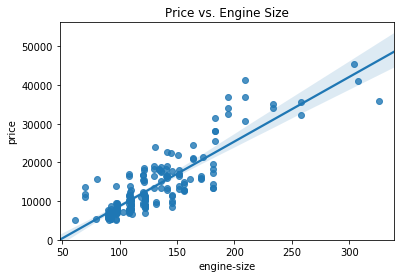

In [122]:
# Scatter plot to show correlation between engine size and price
plt.title('Price vs. Engine Size')
sns.regplot(x="engine-size", y="price", data=cars_df)
plt.ylim(0,)

(0, 49475.187751873484)

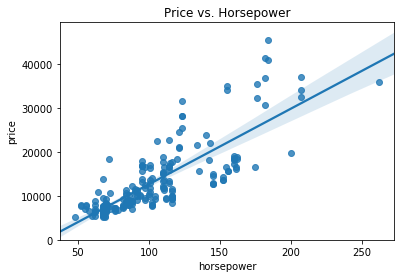

In [123]:
# Scatter plot to show correlation between horsepower and price
plt.title('Price vs. Horsepower')
sns.regplot(x="horsepower", y="price", data=cars_df)
plt.ylim(0,)

(0, 48289.631046955576)

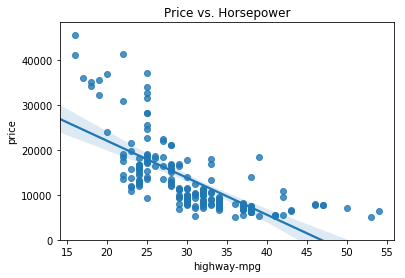

In [129]:
# Scatter plot to show correlation between hwy mpg and price
plt.title('Price vs. Hwy mpg')
sns.regplot(x="highway-mpg", y="price", data=cars_df)
plt.ylim(0,)

(0, 48360.71094314015)

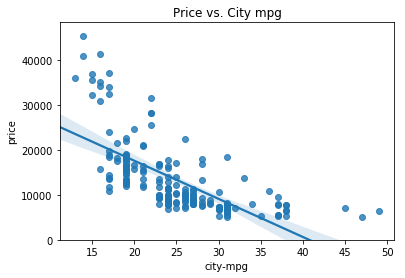

In [133]:
# Scatter plot to show correlation between hwy mpg and price
plt.title('Price vs. City mpg')
sns.regplot(x="city-mpg", y="price", data=cars_df)
plt.ylim(0,)

(0, 47436.15466888818)

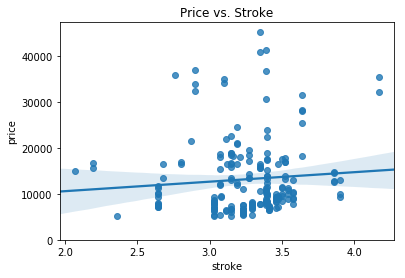

In [134]:
# Scatter plot to show very weak correlation between price and stroke
plt.title('Price vs. Stroke')
sns.regplot(x="stroke", y="price", data=cars_df)
plt.ylim(0,)

# When we have categorical variables, and we want to analyse how the correlation between the different categories, we use ANOVA.
# ANOVA (Analysis of Variance) is statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters: 
# F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.
# P-value: P-value tells how statistically significant is our calculated score value.

In [173]:
# Group by drive-wheels
drive_wheels_grp = cars_df[['drive-wheels', 'price']].groupby(['drive-wheels'])
drive_wheels_grp.head()

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
2,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
6,fwd,17710.0
7,fwd,18920.0
8,fwd,23875.0
9,rwd,16430.0


In [179]:
# Calculate f score and p values between 4wd, fwd, rwd
f_val, p_val = stats.f_oneway(drive_wheels_grp.get_group('4wd')['price'], drive_wheels_grp.get_group('fwd')['price'], 
               drive_wheels_grp.get_group('rwd')['price'])
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


# F Score is large and P value is very small. This means that there are significant differences between the means of the 3 groups of drive-wheels. 

In [181]:
f_val, p_val = stats.f_oneway(drive_wheels_grp.get_group('4wd')['price'], drive_wheels_grp.get_group('fwd')['price'])
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


# F Score is small and P value is large. This means that there aren't significant differences between the means of price for FWD and 4WD drive-wheel cars

# What about the Make of the cars?

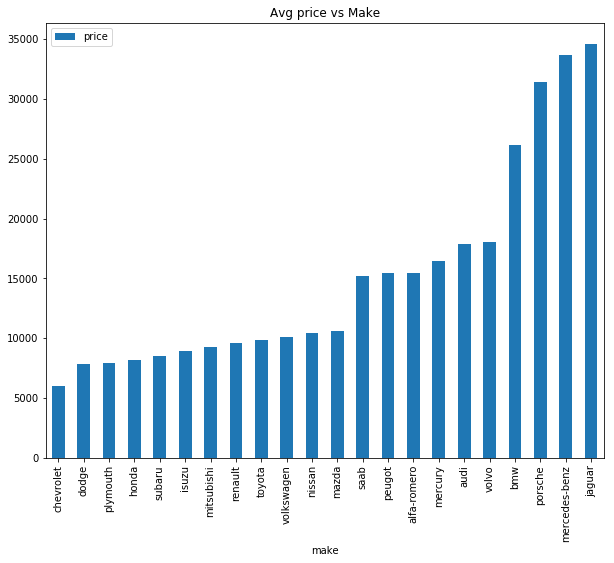

In [223]:
# Plot the average price according to the make of the cars
make_grp = cars_df[['make', 'price']].groupby(['make']).mean()
make_grp.sort_values(by='price').plot(kind='bar', title='Avg price vs Make', figsize=(10,8))

# Can we determine the price based on the make of the cars?

In [222]:
# Group by make
make_grp = cars_df[['make', 'price']].groupby(['make'])
# Calculate f score and p values between Honda and Subaru
f_val, p_val = stats.f_oneway(make_grp.get_group('honda')['price'], make_grp.get_group('subaru')['price'])
print( "ANOVA results: F=", f_val, ", P =", p_val) 

# Calculate f score and p values between Honda and Mercedes_Benz
f_val, p_val = stats.f_oneway(make_grp.get_group('honda')['price'], make_grp.get_group('mercedes-benz')['price'])
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 0.19744030127462606 , P = 0.6609478240622193
ANOVA results: F= 163.24821122701664 , P = 8.91742084640138e-11


# Large F score and very small P value in case of Honda/Mercedes-Benz shows strong correlation and almost certain statistical significance. For Honda/Subaru, we see weak correlation. And this makes sense. Using ANOVA, we determine the difference in mean price of a car based on what make